In [2]:
import pandas as pd

dataset = pd.read_csv("dataframe_mfcc.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X, X.shape)
print(y, y.shape)

[[-3.4733340e+02  1.4550429e+02 -5.1685514e+00 ... -1.5480552e+00
  -2.2267370e+00 -7.8686225e-01]
 [-3.8920663e+02  1.3840308e+02 -2.6069465e-01 ... -1.0666530e+00
  -1.3387060e+00 -6.8136746e-01]
 [-3.7036432e+02  1.7149876e+02  1.6114351e+01 ... -2.5173965e+00
  -2.6517227e+00 -2.1333637e+00]
 ...
 [-2.8841830e+02  1.5284421e+02  1.7741117e+01 ... -2.7452605e+00
  -2.4179560e+00 -2.5631697e+00]
 [-3.0633496e+02  1.7913683e+02 -1.2412021e+01 ...  1.7721994e+00
   5.5293244e-01  6.2745760e-01]
 [-5.3834670e+02  1.3211230e+02 -2.1035036e+01 ... -2.5956695e+00
  -5.7764983e-01 -1.8311582e+00]] (549, 50)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Correct classification rate: 0.5409836065573771


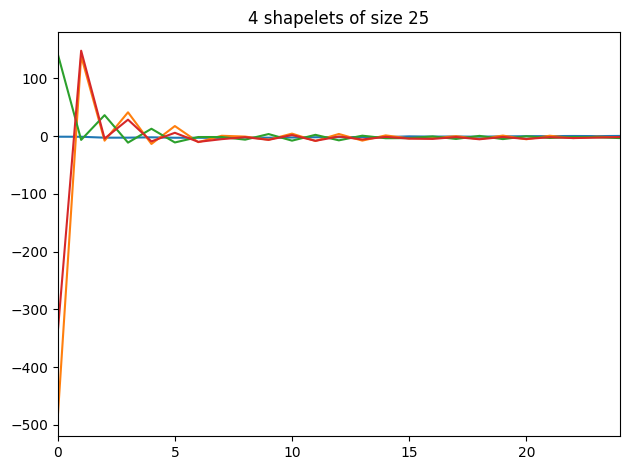

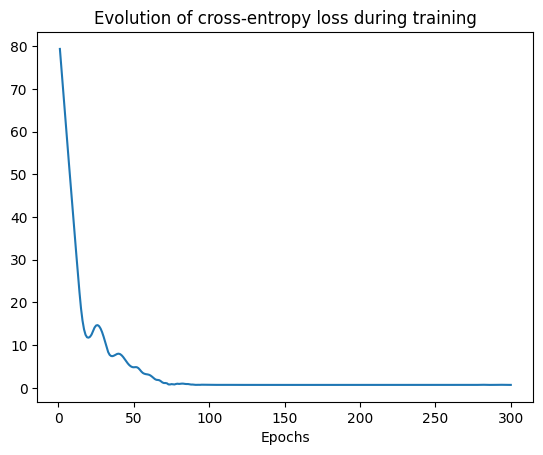

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tslearn.utils import ts_size
from sklearn.metrics import accuracy_score
from tslearn.shapelets import LearningShapelets, grabocka_params_to_shapelet_size_dict


# Get statistics of the dataset
n_ts, ts_sz = X.shape[:2]
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.5,
                                                       r=1)

# Define o modelo com parâmetros fornecidos pelos autores
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=549,
                            weight_regularizer=.01,
                            max_iter=300,
                            random_state=1,
                            verbose=0)
shp_clf.fit(X, y)

# Make predictions and calculate accuracy score
pred_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, pred_labels))

# Plot the different discovered shapelets
plt.figure()
for i, sz in enumerate(shapelet_sizes.keys()):
    plt.subplot(len(shapelet_sizes), 1, i + 1)
    plt.title("%d shapelets of size %d" % (shapelet_sizes[sz], sz))
    for shp in shp_clf.shapelets_:
        if ts_size(shp) == sz:
            plt.plot(shp.ravel())
    plt.xlim([0, max(shapelet_sizes.keys()) - 1])

plt.tight_layout()
plt.show()

# The loss history is accessible via the `model_` that is a keras model
plt.figure()
plt.plot(np.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
plt.title("Evolution of cross-entropy loss during training")
plt.xlabel("Epochs")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Treinar o modelo
model = KNeighborsTimeSeriesClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Exibir os resultados
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.42727272727272725
Precision: 0.4426229508196721
Recall: 0.48214285714285715
F1 Score: 0.4615384615384615
ROC AUC: 0.4262566137566138
